# ROC Curve with Digits Dataset
ummuglsmarsln@gmail.com @2022

In [1]:
from IPython.display import IFrame

url = "https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/"
IFrame(url, width=700, height=350)

# Data

I will keep it simple and use the Digits dataset from scikit-learn. 

In [5]:
from operator import itemgetter

import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn import datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

from matplotlib import pyplot as plt

%matplotlib inline

DEBUG=False

random_state = 0

In [7]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [8]:
X = digits.data
Y = labels = digits.target

feature_names = digits.feature_names
Y_names = digits.target_names

n_labels = len(Y_names)

n_samples, n_features = X.shape

print("n_labels=%d \t n_samples=%d \t n_features=%d" % (n_labels, n_samples, n_features))

n_labels=10 	 n_samples=1797 	 n_features=64


We will binarize the labels so that we can analyze each case separately:

In [9]:
Y = label_binarize(Y, classes=range(n_labels))
n_classes = Y.shape[1]
Y

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

# Generating the Model Probabilities
Our goal is just to work on the ROC curve, so we won't split the data into train and test sets. Let's use OneVsRestClassifier to make predictions on the dataset:

In [10]:
from sklearn.linear_model import LogisticRegression

classifier = OneVsRestClassifier(LogisticRegression(solver='lbfgs',
                                 random_state=random_state))

classifier.fit(X, Y)

/Users/gulsum/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gulsum/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

OneVsRestClassifier(estimator=LogisticRegression(random_state=0))

In [11]:
Y_pred = classifier.predict(X)
Y_pred

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

But for the ROC curve we will use the probabilities classifier computed for each class:

In [13]:
Y_pred_prob = classifier.predict_proba(X)
Y_pred_prob

array([[9.99999821e-01, 6.56683912e-15, 6.15172252e-09, ...,
        4.11842902e-06, 1.23278672e-05, 4.64888967e-05],
       [2.56426395e-18, 9.99812412e-01, 8.35546984e-10, ...,
        2.25726579e-13, 2.79910942e-04, 4.28740892e-10],
       [2.52085554e-11, 1.89954796e-03, 9.99943784e-01, ...,
        9.17817086e-16, 8.03875431e-02, 9.50605177e-13],
       ...,
       [3.44164617e-12, 4.49357761e-05, 2.58705096e-08, ...,
        1.36737987e-15, 9.96618504e-01, 7.79311255e-11],
       [2.75119772e-03, 2.65589373e-07, 5.10839922e-11, ...,
        2.27906489e-12, 1.43340013e-02, 9.99985790e-01],
       [1.95552713e-10, 5.78202594e-08, 8.26407634e-09, ...,
        1.91193011e-18, 9.54117694e-01, 3.52039231e-06]])

So, the model used the maximum of each row to predict the final class.

# Using the Metrics Module
We will use the metrics package to compute the ROC curve and AUC for each class:

In [61]:
fpr = dict()
tpr = dict()
roc_auc = dict()
thresholds = dict()
for n_class in range(n_classes):
    fpr[n_class], tpr[n_class], thresholds[n_class] = roc_curve(Y[:, n_class], Y_pred_prob[:, n_class])
    roc_auc[n_class] = auc(fpr[n_class], tpr[n_class])

Let's plot the ROC curve for each class. Here are the colors we will use:

In [62]:
colors = ["blue", "red", "green"]
for name, color in zip(Y_names, colors):
    print("{0} <-> {1}".format(name, color))

0 <-> blue
1 <-> red
2 <-> green


We will use the same code repeatedly, so let's write a function for it:

In [63]:
def plot_ROC_curve(n_class, fpr, tpr, roc_auc):

    buffer = 0.01 # to be able to clearly visualize the graph close to the boundaries
    lw = 3  # line width

    plt.figure()
    plt.plot(fpr[n_class], tpr[n_class], color=colors[n_class],
             lw=lw, label="{} (AUC = {:0.4f})".format(Y_names[n_class], roc_auc[n_class]))

    plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
    plt.xlim([-buffer, 1.0])
    plt.ylim([0.0, 1.0+buffer])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for class \"{}\"'.format(Y_names[n_class]))
    plt.legend(loc=(1.01, 0.5))
    plt.show()

Here is the plot of the ROC curve for the each class:

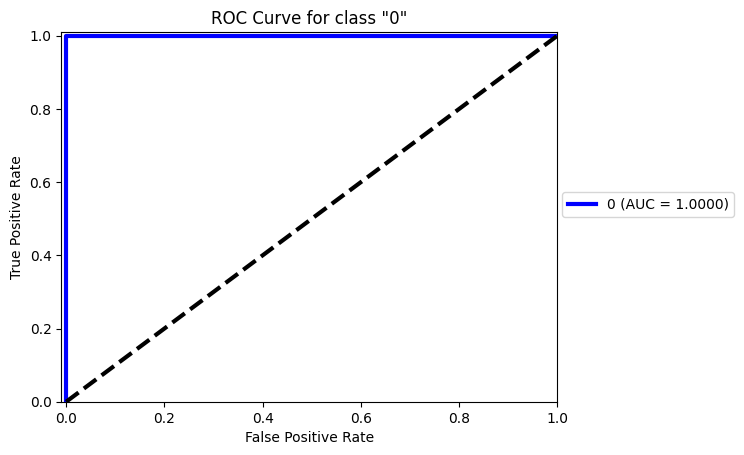

In [64]:
plot_ROC_curve(0, fpr, tpr, roc_auc)

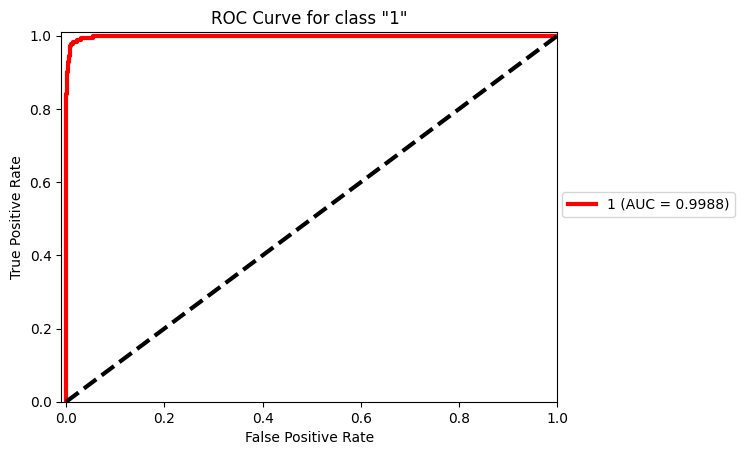

In [65]:
plot_ROC_curve(1, fpr, tpr, roc_auc)

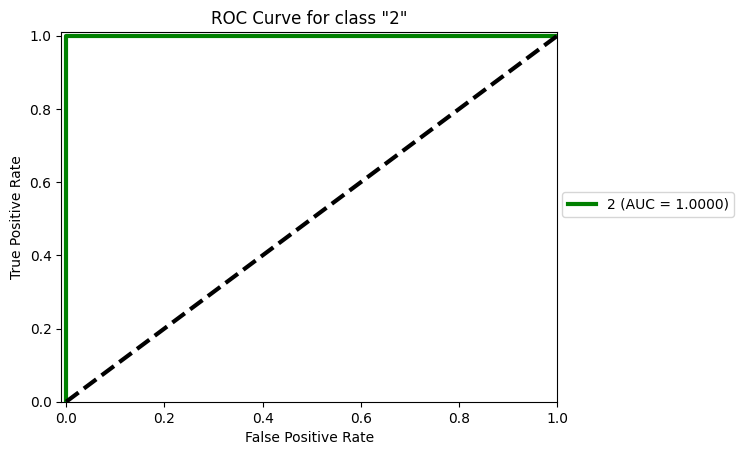

In [66]:
plot_ROC_curve(2, fpr, tpr, roc_auc)

# Computing from the Ground up
Now, let's compute the ROC curve points ourselves. For a given threshold, we will compute the TPR and FPR of the results. Let's start with an example threshold of 0.5:

In [71]:
threshold = 0.5

n_class = 2

N, P, TP, FP = 0, 0, 0, 0

for j in range(len(Y_pred_prob)):
    if Y[j][n_class] == 1:
        P += 1
    if Y[j][n_class] == 0:
        N += 1    
    if Y_pred_prob[j][n_class] >= threshold:
        if Y[j][n_class] == 1:
            TP += 1
        if Y[j][n_class] == 0:
            FP += 1

my_fpr = FP/float(N)
my_tpr = TP/float(P)

print(N, P, TP, FP, my_fpr, my_tpr)

1620 177 177 0 0.0 1.0


This is just one of the points on the plot. We need to repeat this for a set of thresholds. We will use 100 values in the range [0, 1], i.e. 0.00, 0.01, 0.02, ..., 1.00:

In [ ]:
n_class = 1

NUM_THRESHOLDS = 10000

my_fpr = {}
my_tpr = {}

my_fpr[n_class] = []
my_tpr[n_class] = []

for i in range(0, NUM_THRESHOLDS+1):
    threshold = i/float(NUM_THRESHOLDS)
    N, P, TP, FP = 0, 0, 0, 0

    for j in range(len(Y_pred_prob)):
        if Y[j][n_class] == 1:
            P += 1
        if Y[j][n_class] == 0:
            N += 1    
        if Y_pred_prob[j][n_class] >= threshold:
            if Y[j][n_class] == 1:
                TP += 1
            if Y[j][n_class] == 0:
                FP += 1

    my_fpr[n_class].append(FP/float(N))
    my_tpr[n_class].append(TP/float(P))
    
print(my_fpr[n_class], my_tpr[n_class])

Let's compute the AUC using the rectanges formed by the y coordinates with all widths equal to 1/NUM_THRESHOLDS :

In [73]:
1/float(NUM_THRESHOLDS)

0.0001

To compute the AUC, first we have to sort the points with respect to the first and second coordinates, so that they form the staircase shape of the ROC Curve:

In [75]:
all_points = list(zip(my_fpr[n_class], my_tpr[n_class]))
all_points.sort(key=itemgetter(0, 1))
all_points

[(0.0, 0.0),
 (0.0, 0.15934065934065933),
 (0.0, 0.1978021978021978),
 (0.0, 0.22527472527472528),
 (0.0, 0.26373626373626374),
 (0.0, 0.29120879120879123),
 (0.0, 0.3131868131868132),
 (0.0, 0.33516483516483514),
 (0.0, 0.34615384615384615),
 (0.0, 0.3626373626373626),
 (0.0, 0.3626373626373626),
 (0.0, 0.3626373626373626),
 (0.0, 0.3791208791208791),
 (0.0, 0.38461538461538464),
 (0.0, 0.3956043956043956),
 (0.0, 0.41208791208791207),
 (0.0, 0.4175824175824176),
 (0.0, 0.4230769230769231),
 (0.0, 0.42857142857142855),
 (0.0, 0.42857142857142855),
 (0.0, 0.42857142857142855),
 (0.0, 0.42857142857142855),
 (0.0, 0.42857142857142855),
 (0.0, 0.4340659340659341),
 (0.0, 0.4340659340659341),
 (0.0, 0.44505494505494503),
 (0.0, 0.45054945054945056),
 (0.0, 0.45054945054945056),
 (0.0, 0.45054945054945056),
 (0.0, 0.45054945054945056),
 (0.0, 0.45604395604395603),
 (0.0, 0.46703296703296704),
 (0.0, 0.46703296703296704),
 (0.0, 0.46703296703296704),
 (0.0, 0.4725274725274725),
 (0.0, 0.4780

In [76]:
my_roc_auc = {}
my_roc_auc[n_class] = 0

for i in range(1,len(all_points)):
    height = all_points[i][0] - all_points[i-1][0]
    base_average = (all_points[i][1] + all_points[i-1][1]) / float(2)
    my_roc_auc[n_class] += height * base_average

print(my_roc_auc[n_class])

0.998766713162998


Let's plot this using our earlier example:

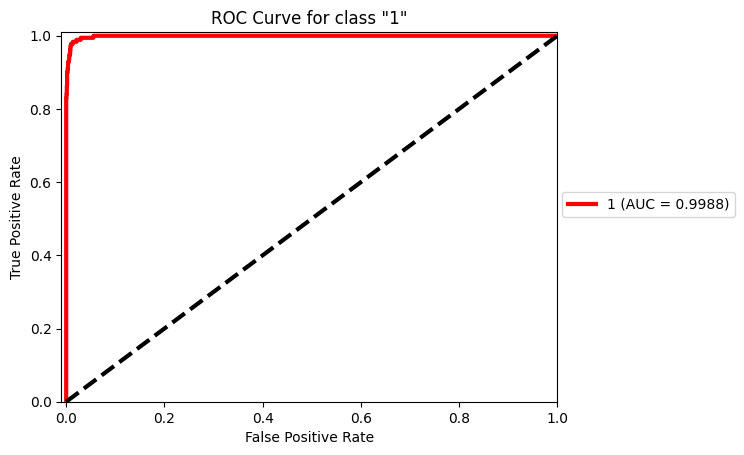

In [77]:
plot_ROC_curve(1, my_fpr, my_tpr, my_roc_auc)

Let's combine all the above and repeat it for all classes:

In [78]:
my_fpr = {}
my_tpr = {}
my_roc_auc = {}

for n_class in range(n_classes):

    my_fpr[n_class] = []
    my_tpr[n_class] = []

    for i in range(0, NUM_THRESHOLDS+1):
        threshold = i/float(NUM_THRESHOLDS)
        N, P, TP, FP = 0, 0, 0, 0

        for j in range(len(Y_pred_prob)):
            if Y[j][n_class] == 1:
                P += 1
            if Y[j][n_class] == 0:
                N += 1    
            if Y_pred_prob[j][n_class] >= threshold:
                if Y[j][n_class] == 1:
                    TP += 1
                if Y[j][n_class] == 0:
                    FP += 1

        my_fpr[n_class].append(FP/float(N))
        my_tpr[n_class].append(TP/float(P))
        
    all_points = list(zip(my_fpr[n_class], my_tpr[n_class]))
    all_points.sort(key=itemgetter(0,1))

    my_roc_auc[n_class] = 0

    for i in range(1,len(all_points)):
        height = all_points[i][0] - all_points[i-1][0]
        base_average = (all_points[i][1] + all_points[i-1][1]) / float(2)
        my_roc_auc[n_class] += height * base_average

    print(my_fpr[n_class], my_tpr[n_class], my_roc_auc[n_class])

[1.0, 0.06176652254478073, 0.04941321803582458, 0.042001235330450894, 0.035206917850525016, 0.02964793082149475, 0.027794935145151328, 0.026559604694255712, 0.0253242742433601, 0.024088943792464484, 0.02285361334156887, 0.021000617665225447, 0.02038295243977764, 0.019765287214329835, 0.019147621988882025, 0.019147621988882025, 0.017294626312538603, 0.016676961087090797, 0.01605929586164299, 0.01605929586164299, 0.01605929586164299, 0.015441630636195183, 0.015441630636195183, 0.014823965410747375, 0.014823965410747375, 0.014823965410747375, 0.014823965410747375, 0.014823965410747375, 0.014206300185299567, 0.014206300185299567, 0.014206300185299567, 0.013588634959851761, 0.012970969734403953, 0.012353304508956145, 0.011117974058060531, 0.009882643607164917, 0.009882643607164917, 0.009882643607164917, 0.009882643607164917, 0.009882643607164917, 0.00926497838171711, 0.008647313156269302, 0.008647313156269302, 0.008647313156269302, 0.0074119827053736875, 0.0074119827053736875, 0.00741198270

Let's plot these new values now:

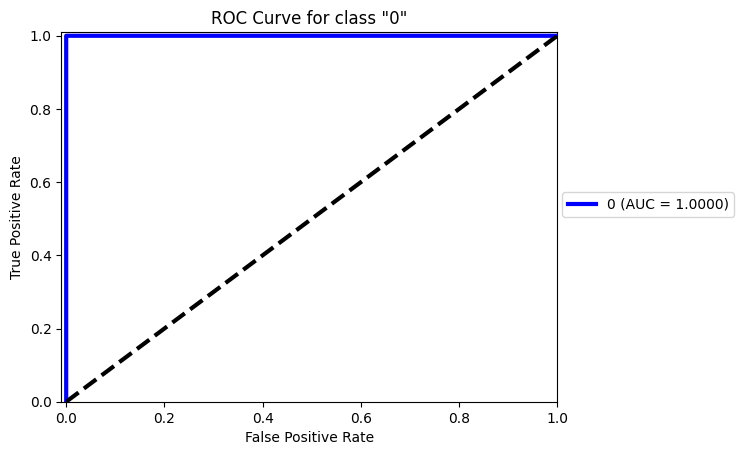

In [79]:
plot_ROC_curve(0, my_fpr, my_tpr, my_roc_auc)

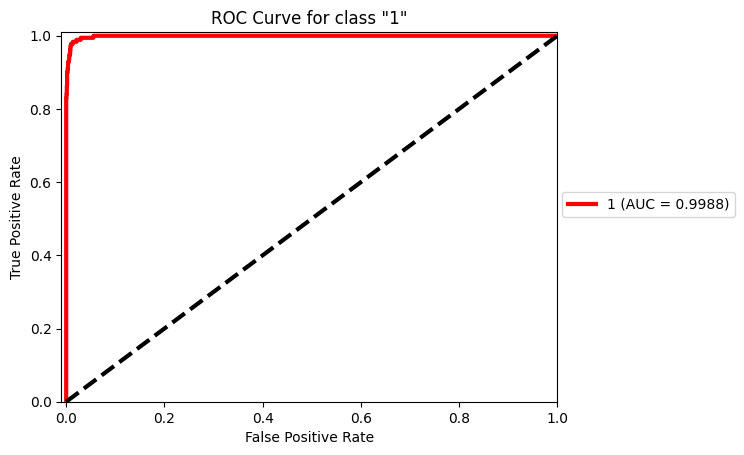

In [80]:
plot_ROC_curve(1, my_fpr, my_tpr, my_roc_auc)

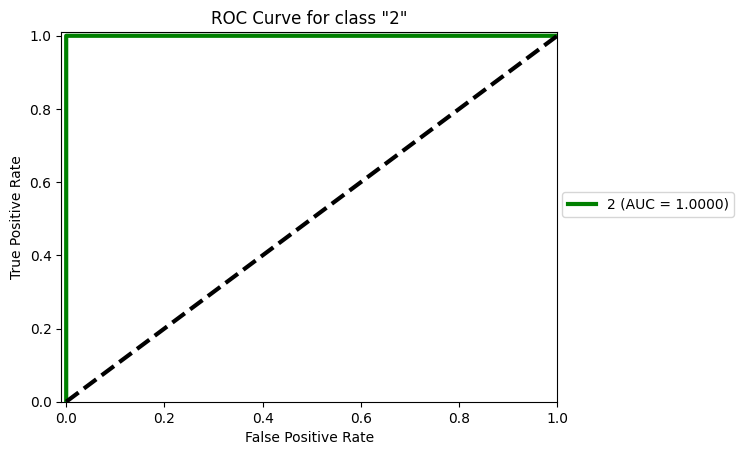

In [81]:
plot_ROC_curve(2, my_fpr, my_tpr, my_roc_auc)

The results are identical to the ones computed by the metrics module. There might have been small differences here due to different set of thresholds used and roundoff errors, e.g. is you choose to work with 1000 points, you may see some differences.

We can check our results by using the "auc" function of the metrics module on our data:

In [83]:
for n_class in range(n_classes):
    my_auc = auc(my_fpr[n_class], my_tpr[n_class])
    print("Class {}  auc={:0.4f}".format(Y_names[n_class], my_auc))

Class 0  auc=1.0000
Class 1  auc=0.9988
Class 2  auc=1.0000
Class 3  auc=0.9999
Class 4  auc=1.0000
Class 5  auc=1.0000
Class 6  auc=1.0000
Class 7  auc=1.0000
Class 8  auc=0.9902
Class 9  auc=0.9962


These are exactly the same results as our AUC computation, so our FPR and TPR computations are correct.